<a href="https://colab.research.google.com/github/MarvinLopezOsorio/AnaliticaPredictiva_TrabajoFinal/blob/Eduardo/Trabajo%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

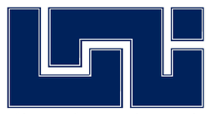

</center>


<center><h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks</center>

[UNI-DEPEC](https://posgrado.uni.edu.ni)

**Estudiantes:** 

*   Marvin López Osorio
*   Eduardo Rivera

# **Trabajo Final**
## **Modelo de Clasificación: Análisis y desarrollo de modelo de clasificación de no aprobación de estudiantes de primer ciclo universitario utilizando Python**
Se desarrolló un modelo de aprendizaje automático de tipo clasificación para predecir el resultado de aprobación de estudiantes en el primer ciclo universitario. 

El estudio se basó en un conjunto de datos generales, encuestas de hábitos de estudio y resultados de análisis psicopedagógicos de los estudiantes del primer ciclo de carreras de ingeniería en una universidad de El Salvador. 

Se confirmaron hipótesis respecto a las relaciones entre las variables involucradas, y a la vez se encontraron correspondencias no previstas entre las variables de estudio.

Se creo un [repositorio en GitHub](https://github.com/MarvinLopezOsorio/AnaliticaPredictiva_TrabajoFinal) donde se almacena la base de datos y el presente cuaderno para consultas futuras.

## **Objetivo**
Predecir si un estudiante reprobará el primer ciclo universitario mediante un modelo de clasificación basado en variables psicopedagógicas, conductuales (malos hábitos) y generales.

## **Antecedentes**
Una universidad de El Salvador desde el año 2013 se planteó el problema de cómo dar acompañamiento a los estudiantes con el objetivo de reducir la deserción en los primeros años de carreras universitarias.


Con la cantidad de estudiantes cercana a siete mil, en el año 2013, se tomaron algunas decisiones:
*   Aplicar una prueba psicométrica para identificar aptitudes y hábitos en los estudiantes de nuevo ingreso.
*   Crear departamento de psicopedagogía que aplicara la prueba y apoyara a los estudiantes, aconsejándoles con base en sus aptitudes.
*   Crear programas de apoyo a los estudiantes para mejorar sus aptitudes.

En base a lo anterior, se creó en el 2014 el departamento 
de psicopedagogía y a partir del 2015 se empezó a aplicar dicha prueba para iniciar una base de datos que sirviera de insumo para crear los programas de apoyo a estudiantes de la universidad.

En 2016, se inició a trabajar en la posibilidad de identificar a los estudiantes que necesitaran mayor orientación para seleccionar la carrera que cursarían y tener éxito en la misma. A partir esta iniciativa, se tomarían decisiones de creación de programas de apoyo y orientación estudiantil para reducir la tasa de deserción que en ese año rondó el 20%.

Se obtuvo de parte del departamento de psicopedagogía una base de datos que contiene datos de 41 carreras, con ingresos de estudiantes entre 2017 y 2021 y las variables psicopedagógicas relevantes.

##**Desarrollo**

###**Descripción de los datos obtenidos**


####****Carga de librerías necesarias****

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

####****Carga de datos****

In [80]:
#Referencias al archivo en repositorio de origen y carga de datos
repo = 'https://github.com/MarvinLopezOsorio/AnaliticaPredictiva_TrabajoFinal/blob/main/Base%20de%20Datos%20Universidad.xlsx?raw=True'
datos = pd.read_excel(repo)
datos.head(3)

,Ingreso,Estado,Sexo,Municipio,Edad,Paes,Carrera,Facultad,Segunda carrera,CUM,Porcentaje de avance,Estado actual,Razonamiento Verbal (DAT- VR),Relaciones Espaciales (DAT - SR),Razonamiento Abstracto (DAT- AR),Aptitud Numérica (DAT - NA),Razonamiento Mecánico (DAT-MR),Rapidez y precisión perceptiva (DAT -CSA),Hábitos,Aprobación,tipo institución
0,2017,ACTIVO,Femenino,Soyapango,23,5.52,Licenciatura en Idiomas con especialidad en la...,Facultad de CC. y Humanidades,NaN,8.4,77.14,ACTIVO,75,15,20,5,45,5,5,Aprobado,Privado
1,2017,ACTIVO,Femenino,Soyapango,23,4.50,Licenciatura en Ciencias de la Comunicación,Facultad de CC. y Humanidades,NaN,8.6,94.00,ACTIVO,75,20,15,50,15,5,1,Aprobado,Privado
2,2017,ACTIVO,Femenino,Soyapango,24,3.83,Licenciatura en Idiomas con especialidad en Tu...,Facultad de CC. y Humanidades,NaN,7.6,79.41,ACTIVO,45,5,10,30,15,5,4,Aprobado,Público


El dataset original continene las siguientes variables:

*   Ingreso, 
*   Estado,
*   Sexo, 
*   Municipio, 
*   Edad, 
*   Paes, 
*   Carrera,
*   Facultad, 
*   Segunda carrera, 
*   CUM, 
*   Porcentaje de avance,
*   Estado actual, 
*   Razonamiento Verbal (DAT- VR),
*   Relaciones Espaciales (DAT - SR), 
*   Razonamiento Abstracto (DAT- AR),
*   Aptitud Numérica (DAT - NA), 
*   Razonamiento Mecánico (DAT-MR),
*   Rapidez y precisión perceptiva (DAT -CSA), 
*   Hábitos, 
*   Aprobación,
*   tipo institución

Se realizaron cambios a los nombres para que facilitar el manejo del dataset.


In [81]:
Columnas = ['Ingreso', 'Estado', 'Sexo', 'Municipio', 'Edad', 'Paes', 'Carrera', 'Facultad', 'Segunda_carrera', 'CUM', 'Avance', 
            'Estado_actual', 'DAT_VR', 'DAT_SR', 'DAT_AR', 'DAT_NA', 'DAT_MR', 'DAT_CSA', 'Hábitos', 'Aprobacion', 'Institucion']
datos.columns = Columnas

El problema de estudio puede ser abordado como una regresión sobre la variable 'CUM', o como clasificación sobre la variable 'Aprobacion'. En este caso se consideró conveniente realizar clasificación sobre 'Aprobacion', ya que el objetivo principal de la institución es identificar aquellos estudiantes que puedan tener deficiencias, y buscar corregirlas, independientemente de la nota que puedan obtener.

Por otra parte, para evitar redundancia, se puede descartar la variable Estado, debido a la situación más reciente dada por Estado_actual.

Es plausible considerar que las variables 'Carrera' y 'Facultad' pueden ser redundantes, sin embargo, se decidió dejarlas presentes en el desarrollo del modelo, ya que una facultad engloba varias carreras y en algunas carreras se tienen muy pocas observaciones, podría ser relevante dejar ambas.


In [82]:
datos.drop(columns=['Estado', 'CUM'])
datos.head(3)

,Ingreso,Estado,Sexo,Municipio,Edad,Paes,Carrera,Facultad,Segunda_carrera,CUM,Avance,Estado_actual,DAT_VR,DAT_SR,DAT_AR,DAT_NA,DAT_MR,DAT_CSA,Hábitos,Aprobacion,Institucion
0,2017,ACTIVO,Femenino,Soyapango,23,5.52,Licenciatura en Idiomas con especialidad en la...,Facultad de CC. y Humanidades,NaN,8.4,77.14,ACTIVO,75,15,20,5,45,5,5,Aprobado,Privado
1,2017,ACTIVO,Femenino,Soyapango,23,4.50,Licenciatura en Ciencias de la Comunicación,Facultad de CC. y Humanidades,NaN,8.6,94.00,ACTIVO,75,20,15,50,15,5,1,Aprobado,Privado
2,2017,ACTIVO,Femenino,Soyapango,24,3.83,Licenciatura en Idiomas con especialidad en Tu...,Facultad de CC. y Humanidades,NaN,7.6,79.41,ACTIVO,45,5,10,30,15,5,4,Aprobado,Público


# **Tipos de datos**

In [83]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ingreso          5992 non-null   int64  
 1   Estado           5992 non-null   object 
 2   Sexo             5992 non-null   object 
 3   Municipio        5992 non-null   object 
 4   Edad             5992 non-null   int64  
 5   Paes             5992 non-null   float64
 6   Carrera          5992 non-null   object 
 7   Facultad         5992 non-null   object 
 8   Segunda_carrera  792 non-null    object 
 9   CUM              5992 non-null   float64
 10  Avance           5992 non-null   float64
 11  Estado_actual    5992 non-null   object 
 12  DAT_VR           5992 non-null   int64  
 13  DAT_SR           5992 non-null   int64  
 14  DAT_AR           5992 non-null   int64  
 15  DAT_NA           5992 non-null   int64  
 16  DAT_MR           5992 non-null   int64  
 17  DAT_CSA       

In [84]:
datos.shape

(5992, 21)

Se tienen 5992 observaciones, con 21 variables, y estas observaciones se han obtenido entre el año 2017 y 2021

In [85]:
datos.size

125832

In [86]:
datos.isna().sum().sort_values() 


Ingreso               0
Hábitos               0
DAT_CSA               0
DAT_MR                0
DAT_NA                0
DAT_AR                0
DAT_SR                0
DAT_VR                0
Estado_actual         0
Aprobacion            0
Avance                0
Facultad              0
Carrera               0
Paes                  0
Edad                  0
Municipio             0
Sexo                  0
Estado                0
CUM                   0
Institucion           0
Segunda_carrera    5200
dtype: int64

Existe una variable llamada "Segunda carrera", la cuál no es relevante, ya que la mayoría de los estudiantes no completan esta parte, y como puede verse 5200 de las observaciones tienen valor ausente. 
Por otro lado las Variables: Estado, Estado_actual, CUM y Avance, no son relevantes para la predicción, ya que son indicadores para la universidad para identificar a los estudiantes como activos, nota actual de cum(habiendo cursado ya algún ciclo) y porcentaje de avance en la carrera
Se procede a eliminar dichas variables del dataframe

In [87]:
datos=datos.drop(columns=['Segunda_carrera','Estado','Estado_actual','CUM','Avance'])
datos.isna().sum().sort_values() 

Ingreso        0
Sexo           0
Municipio      0
Edad           0
Paes           0
Carrera        0
Facultad       0
DAT_VR         0
DAT_SR         0
DAT_AR         0
DAT_NA         0
DAT_MR         0
DAT_CSA        0
Hábitos        0
Aprobacion     0
Institucion    0
dtype: int64

In [88]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ingreso      5992 non-null   int64  
 1   Sexo         5992 non-null   object 
 2   Municipio    5992 non-null   object 
 3   Edad         5992 non-null   int64  
 4   Paes         5992 non-null   float64
 5   Carrera      5992 non-null   object 
 6   Facultad     5992 non-null   object 
 7   DAT_VR       5992 non-null   int64  
 8   DAT_SR       5992 non-null   int64  
 9   DAT_AR       5992 non-null   int64  
 10  DAT_NA       5992 non-null   int64  
 11  DAT_MR       5992 non-null   int64  
 12  DAT_CSA      5992 non-null   int64  
 13  Hábitos      5992 non-null   int64  
 14  Aprobacion   5992 non-null   object 
 15  Institucion  5992 non-null   object 
dtypes: float64(1), int64(9), object(6)
memory usage: 749.1+ KB


Se verifica la variable objetivo con un Histograma

In [89]:
import plotly.express as px
import plotly.figure_factory as ff

In [90]:
fig = px.histogram(datos, x = datos.Aprobacion,
                   title="Distribución variable objetivo", 
                   color_discrete_sequence = ["red"], # color 
                   marginal="rug")
fig.show()

Se tiene más Aprobados que Reprobados, y es cercano la diferencia es cercana al doble

In [91]:
fig = px.histogram(datos, x = datos.DAT_AR,
                   title="Distribución variable objetivo", 
                   color_discrete_sequence = ["red"], # color 
                   marginal="rug")
fig.show()

Al hacer la prueba de distribución en histograma de las variables de aptitud, se puede ver que estan un poco dispersas, pero posteriormente se tendrá en el preprocesado la estandarización y normalización.

# **Análisis Descriptivo**

In [92]:
round(datos.select_dtypes(include=["float64", "int"]).describe(),2)

,Ingreso,Edad,Paes,DAT_VR,DAT_SR,DAT_AR,DAT_NA,DAT_MR,DAT_CSA,Hábitos
count,5992.00,5992.00,5992.00,5992.00,5992.00,5992.00,5992.00,5992.00,5992.00,5992.00
mean,2018.84,21.67,6.33,62.97,38.10,42.74,63.53,45.43,32.19,5.21
std,1.38,3.18,2.28,27.37,29.29,27.60,27.04,27.65,25.14,3.94
min,2017.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2018.00,20.00,5.12,40.00,10.00,20.00,40.00,20.00,5.00,2.00
50%,2019.00,21.00,7.52,70.00,30.00,40.00,70.00,40.00,30.00,5.00
75%,2020.00,23.00,7.93,85.00,60.00,70.00,85.00,70.00,55.00,7.00
max,2021.00,108.00,10.00,100.00,100.00,100.00,100.00,100.00,100.00,28.00


In [72]:
fig = px.histogram(datos, x = datos.Ingreso,
                   title="Ingreso de Estudiantes por año",
                   color_discrete_sequence = ["blue"])
fig.show()

En el gráfico anterior, podemos observar que la cantidad de estudiantes que ingresaron, casi fue constante, menos en el 2021, que hubo una reducción

In [94]:
fig = px.histogram(datos, x = datos.Edad,
                   color_discrete_sequence = ["darkorange"],
                   title="Distribución de edad")
fig.show()

La mayor parte de los estudiantes que ingresan a la universidad se concentra entre los 17 y 21 años, y hay unos pocos que tienen arriba de 25 que son los que ingresan a maestrías y doctorados y que también pueden tomar el examen Psicopedagógico de aptitudes y encuesta de malos hábitos.
Que se identifican datos mal digitados y se corroboró y se modificó.

In [95]:
datos[datos.Edad==2] = 20
datos[datos.Edad==108] = 18
fig = px.histogram(datos, x = datos.Edad,
                   color_discrete_sequence = ["darkorange"],
                   title="Distribución de edad")
fig.show()


In [74]:
fig = px.histogram(datos, x = datos.Paes,
                   color_discrete_sequence = ["darkorange"],
                   title="Nota PAES")
fig.show()

La nota PAES es variada y se tiene una alta concentración entre 7.5 y 8.5, pero el grueso de los estudiantes estan abajo de 7.2 y muy pocos arriba de 8.5

In [96]:
fig = px.histogram(datos, x = datos.Hábitos,
                   color_discrete_sequence = ["magenta"],
                   title="Cantidad de malos hábitos")
fig.show()

La gráfica nos muestra que hay una granconcetración de malos habitos y que al menos declaran que tienen un mal hábito pero en promedio cada estudiante tiene 5 posibles malos hábitos


# **Correlación de variables númericas**

In [76]:
corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')

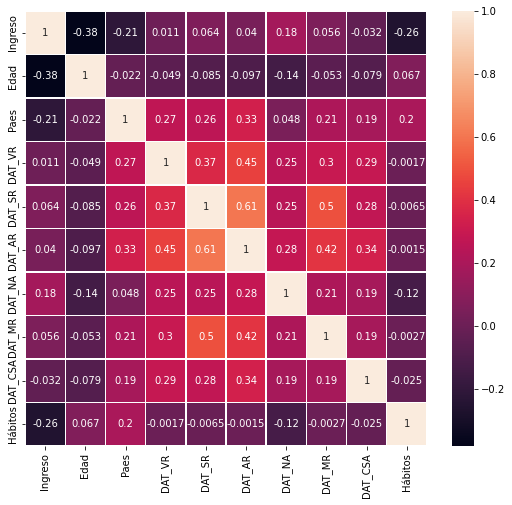

In [77]:
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix, 
            annot=True,
            linewidths=.5)

plt.show()

Las variables que influiran más en el resultado deberían de ser las aptitudes, especificamente DAT_AR(Razonamiento no verbal, interpretación de planos o diagramas o instrucciones) y DAT_SR(Razonamiento espacial, percepción de las dimensiones y objetos), independientemente de la carrera que vaya a estudiar.
un dato curioso es que los malos hábitos no tienen una correlación fuerte con niguna de las otras variables.

# **Variables Cualitativas**

In [78]:
datos.select_dtypes(include=["object"]).describe()

,Sexo,Municipio,Carrera,Facultad,Aprobacion,Institucion
count,5992,5992,5992,5992,5992,5992
unique,2,160,41,6,2,3
top,Masculino,Soyapango,Licenciatura en Idiomas con especialidad en Tu...,Facultad de CC. y Humanidades,Aprobado,Privado
freq,3286,1238,766,2379,4080,2961


La variable Sexo e Institución se han dejado, para verificar la inluencia que puedan tener en la aprobación.

##**Conclusiones**